<a href="https://colab.research.google.com/github/wulanwidiasari/PVCK_Genap_2022/blob/main/uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Detection**

Nama Anggota Kelompok :
1.   Redhia Farari
2.   Wulan Widiasari



In [ ]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library yang dibutuhkan
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

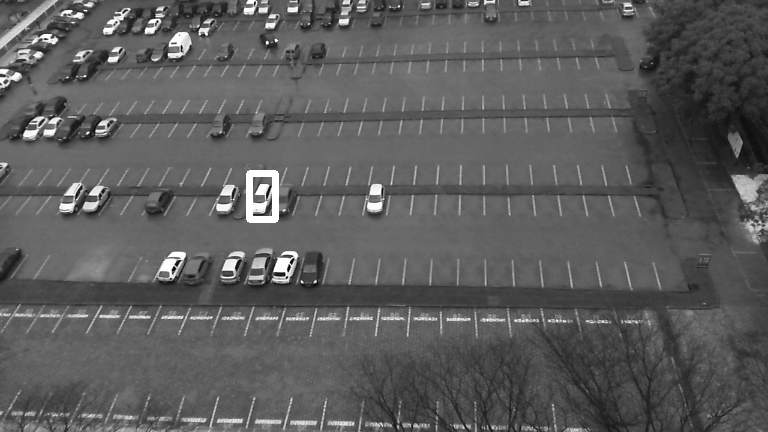

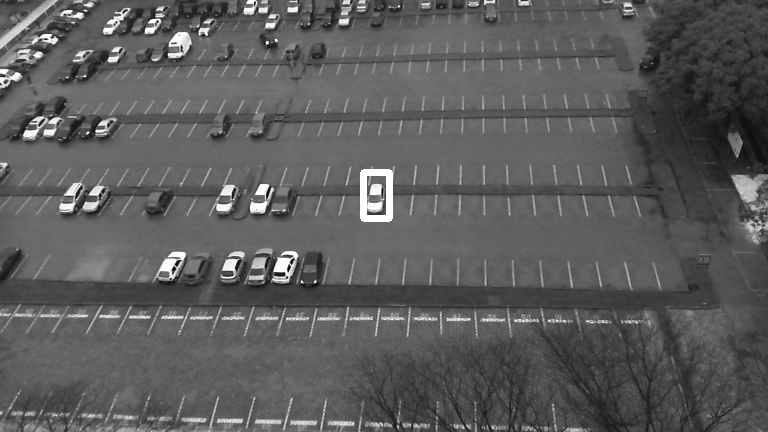

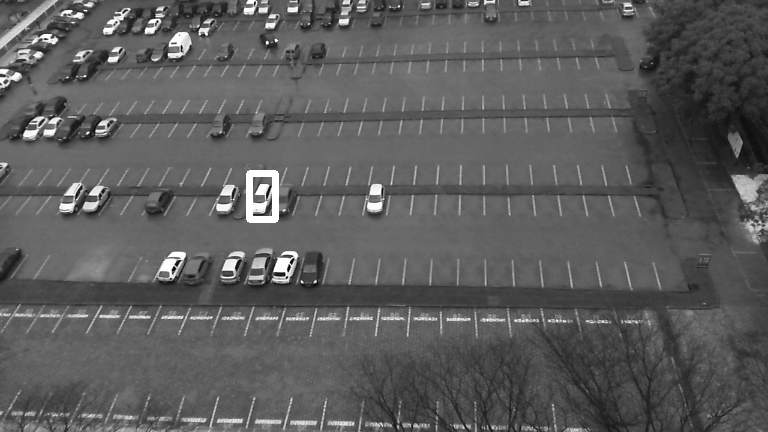

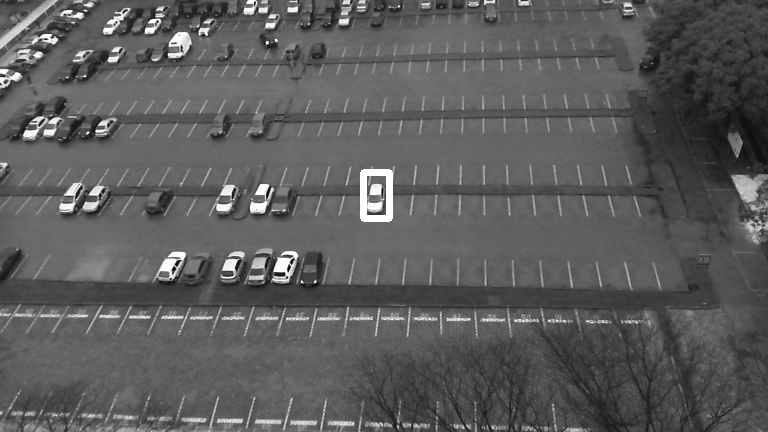

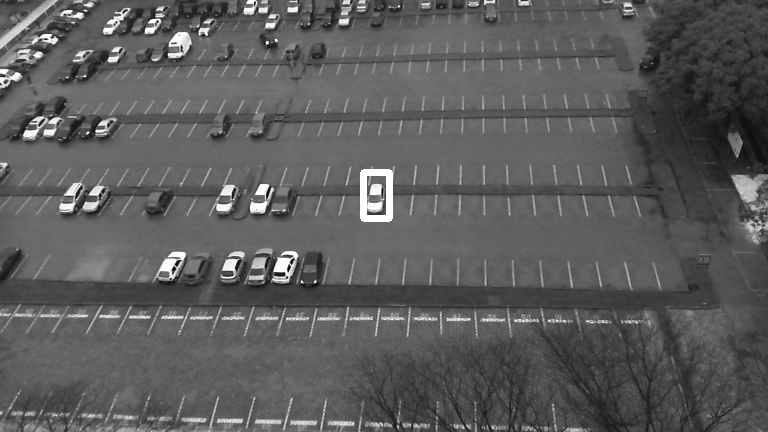

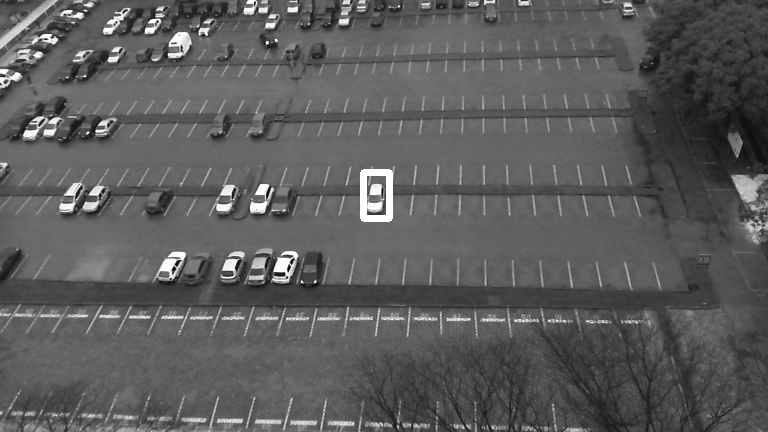

In [ ]:
img = cv2.resize(cv2.imread('/content/drive/MyDrive/Images/Minggu14/CarPark/bagian1.jpg', 0), (0, 0), fx=0.6, fy=0.6)
template = cv2.resize(cv2.imread('/content/drive/MyDrive/Images/Minggu14/CarPark/template_mobil.png', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    cv2_imshow(img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# import library yolo

!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"


--2022-06-18 16:10:29--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  40.4MB/s    in 6.3s    

2022-06-18 16:10:36 (37.8 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-06-18 16:10:36--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names.1’

coco.names.1        100%[===================>]     625  --.-KB/s    in 0s      



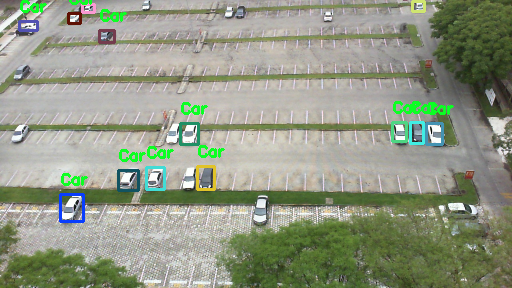

In [ ]:
# memproses library yolo

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Memproses gambar
img = cv2.imread('/content/drive/MyDrive/Images/Minggu14/CarPark/bagian3.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Deteksi Objek
blob = cv2.dnn.blobFromImage(img, 0.00392, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Menampilkan informasi di layar
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Deteksi objek
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Memberikan penjelasan yaitu tag "Car" kepada setiap objek yang berhasil dipindai
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()